## numpy的基本操作

In [2]:
import numpy as np
a = np.array([1, 2, 3], dtype=np.float32)
a, type(a), a.shape, a.dtype

(array([1., 2., 3.], dtype=float32), numpy.ndarray, (3,), dtype('float32'))

In [3]:
b = np.zeros((3, 3), dtype=np.float32)
print(b, b.shape, b.dtype)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] (3, 3) float32


In [6]:
c = np.ones((3, 3))
print(c, c.shape, c.dtype)
c = np.ones((3, 3)).astype(np.float32)
print(c, c.shape, c.dtype)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] (3, 3) float64
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] (3, 3) float32


In [7]:
d = np.random.randn(3, 3)
d

array([[-0.51790107,  1.7382346 ,  2.80008284],
       [ 0.31094286,  0.12023191,  0.08898591],
       [ 1.21113966, -1.92903147, -0.67263571]])

In [8]:
f = d[:, 0]
print(f, f.shape)

[-0.51790107  0.31094286  1.21113966] (3,)


In [10]:
w = d[:, :2] * 3
w, w.shape

(array([[-1.5537032 ,  5.2147038 ],
        [ 0.93282858,  0.36069572],
        [ 3.63341898, -5.78709442]]),
 (3, 2))

In [14]:
d.argmax(axis=0) # 行方向取最大值，一个列中最大的数所在的行数位置

array([2, 0, 0], dtype=int64)

In [15]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
f = w.copy()
f[0, :] = 1
print(f)
print(w)

[[ 1.          1.        ]
 [ 0.93282858  0.36069572]
 [ 3.63341898 -5.78709442]]
[[-1.5537032   5.2147038 ]
 [ 0.93282858  0.36069572]
 [ 3.63341898 -5.78709442]]


In [17]:
k = w[[0, 2], :]
k

array([[-1.5537032 ,  5.2147038 ],
       [ 3.63341898, -5.78709442]])

## OpenCV的基本操作

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import cv2
image = cv2.imread("tly.jpeg") # 3个channel，分别对应BGR
image.shape, image.dtype, type(image)

((1138, 640, 3), dtype('uint8'), numpy.ndarray)

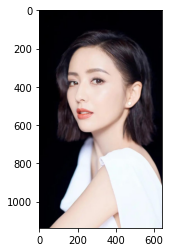

In [10]:
plt.imshow(image[:, :, [2, 1, 0]]) # plt imshow要求是RGB，但是cv2.imshow是BGR的，可以正常显示

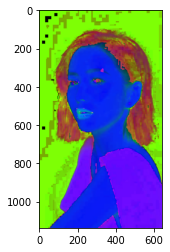

In [11]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

In [12]:
cv2.rectangle.__doc__

'rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img\n.   @brief Draws a simple, thick, or filled up-right rectangle.\n.   \n.   The function cv::rectangle draws a rectangle outline or a filled rectangle whose two opposite corners\n.   are pt1 and pt2.\n.   \n.   @param img Image.\n.   @param pt1 Vertex of the rectangle.\n.   @param pt2 Vertex of the rectangle opposite to pt1 .\n.   @param color Rectangle color or brightness (grayscale image).\n.   @param thickness Thickness of lines that make up the rectangle. Negative values, like #FILLED,\n.   mean that the function has to draw a filled rectangle.\n.   @param lineType Type of the line. See #LineTypes\n.   @param shift Number of fractional bits in the point coordinates.\n\n\n\nrectangle(img, rec, color[, thickness[, lineType[, shift]]]) -> img\n.   @overload\n.   \n.   use `rec` parameter as alternative specification of the drawn rectangle: `r.tl() and\n.   r.br()-Point(1,1)` are opposite corners'

In [13]:
cv2.circle.__doc__

'circle(img, center, radius, color[, thickness[, lineType[, shift]]]) -> img\n.   @brief Draws a circle.\n.   \n.   The function cv::circle draws a simple or filled circle with a given center and radius.\n.   @param img Image where the circle is drawn.\n.   @param center Center of the circle.\n.   @param radius Radius of the circle.\n.   @param color Circle color.\n.   @param thickness Thickness of the circle outline, if positive. Negative values, like #FILLED,\n.   mean that a filled circle is to be drawn.\n.   @param lineType Type of the circle boundary. See #LineTypes\n.   @param shift Number of fractional bits in the coordinates of the center and in the radius value.'

True

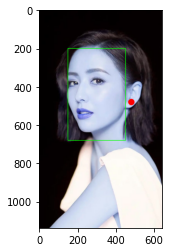

In [14]:
x, y, r, b = 150, 200, 450, 680
image = cv2.imread("tly.jpeg")
cv2.rectangle(image, (x, y), (r, b), (0,255,0), 2)
cv2.circle(image, (480, 480), 16, (255,0,0), -1, lineType=16)
plt.imshow(image)
cv2.imwrite("tly_save.png", image)

## PIL库

PIL.JpegImagePlugin.JpegImageFile

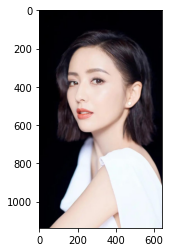

In [15]:
from PIL import Image
img = Image.open("tly.jpeg")
plt.imshow(img)
type(img)

(1920, 1080)


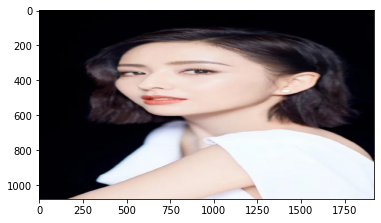

In [16]:
resized = img.resize((1920, 1080))
plt.imshow(resized)
print(resized.size)

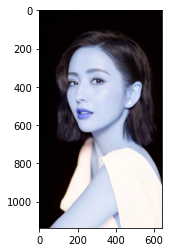

In [17]:
cv_img = cv2.imread("tly.jpeg")
pil_img = Image.fromarray(cv_img)
plt.imshow(pil_img)

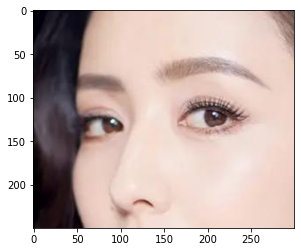

In [18]:
crop = cv_img[250:500, 100:400, :]
plt.imshow(crop[:, :, [2, 1, 0]])

## Torch的基本操作

In [19]:
import torch

In [20]:
a = torch.tensor([1, 2, 3], dtype=torch.float32)
print(a, a.shape, a.dtype, a.size(0))

tensor([1., 2., 3.]) torch.Size([3]) torch.float32 3


In [21]:
b = torch.zeros((3, 3)).float()
print(b, b.size(), b.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) torch.Size([3, 3]) torch.float32


In [22]:
c = torch.tensor([[1,2,3],[4,5,6]]).float()
print(c, c.size(), c.dtype)

tensor([[1., 2., 3.],
        [4., 5., 6.]]) torch.Size([2, 3]) torch.float32


In [23]:
d = torch.rand((3, 3)).float()
print(d, d.size(), d.dtype)

tensor([[0.5282, 0.1092, 0.0051],
        [0.7052, 0.2343, 0.2114],
        [0.2719, 0.3715, 0.1924]]) torch.Size([3, 3]) torch.float32


In [24]:
e = torch.ones((3, 3))
print(e, e.size(), e.dtype)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) torch.Size([3, 3]) torch.float32


In [25]:
f = torch.eye(3, 3)
print(f, f.size(), f.dtype)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]) torch.Size([3, 3]) torch.float32


In [26]:
# 增加维度： None
k = f[None, :, :, None]
print(k, k.size(), f.shape)

# H W C
# N C H W
# C H W
# 1 C H W
k = f[None]
k.shape

tensor([[[[1.],
          [0.],
          [0.]],

         [[0.],
          [1.],
          [0.]],

         [[0.],
          [0.],
          [1.]]]]) torch.Size([1, 3, 3, 1]) torch.Size([3, 3])


torch.Size([1, 3, 3])

In [27]:
u = k.squeeze() # 去掉为1的维度
u.shape

torch.Size([3, 3])

In [28]:
l = u.unsqueeze(1)
l.shape

torch.Size([3, 1, 3])

## Torch的自动梯度计算

In [29]:
a = torch.tensor(10.).requires_grad_(True)
b = torch.tensor(5., requires_grad=True)
c = a * b * 1.5
c.backward()
a.grad, b.grad

(tensor(7.5000), tensor(15.))

## Torch的模型

In [30]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3)
        self.relu1 = nn.ReLU(True)
        
    def forward(self, x):
        self.conv1(x)
        self.relu1(x)
        return x
    
model = Model()

In [31]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_version',
 'add_module',
 'apply',


In [32]:
model._modules

OrderedDict([('conv1', Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))),
             ('relu1', ReLU(inplace=True))])

In [33]:
for name, operator in model._modules.items():
    print(name, operator)

conv1 Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
relu1 ReLU(inplace=True)


In [34]:
# 模型的加载和保存，无非就是保存网络结构和权重偏置等数据
model.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-0.1802,  0.0698,  0.1413],
                        [-0.0914, -0.0550,  0.0420],
                        [-0.1052,  0.1664,  0.0228]],
              
                       [[-0.0583, -0.0161,  0.0092],
                        [-0.0979,  0.0545, -0.0906],
                        [-0.0173, -0.1629,  0.0725]],
              
                       [[-0.0356, -0.0422, -0.1362],
                        [-0.1108,  0.0635,  0.0580],
                        [ 0.0785, -0.1042,  0.1794]]],
              
              
                      [[[-0.0261, -0.0586,  0.0803],
                        [-0.1126, -0.1652,  0.1149],
                        [ 0.0454, -0.1324, -0.0651]],
              
                       [[-0.1484, -0.1476, -0.0007],
                        [-0.0070,  0.0386,  0.0481],
                        [-0.0353,  0.1677, -0.0534]],
              
                       [[ 0.0477, -0.1034, -0.0368],
                        [ 

In [37]:
conv1_weight = model.state_dict()["conv1.weight"]
conv1_weight.shape

torch.Size([64, 3, 3, 3])